In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *
from src.utils.data_utils import *
from src.utils.plot_utils import *

[nltk_data] Downloading package stopwords to /Users/chsce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IMPORTANT: these scripts/functions assume you have the following files in the data/raw directory:
- From the CMU dataset: 
    - movie.metadata.tsv
    - plot_summaries.txt
- From the TMDB dataset: 
    - TMDB_movie_dataset_v11.csv

AND have data/processed folder created

Note: download CMU dataset here: https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
and TMDB dataset here (Download button): https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [2]:
# from raw files, creates clean datafiles
%run src/data/clean_data.py

Loading data from data/raw/TMDB_movie_dataset_v11.csv...
original df shape (1127777, 24)
after status (1102507, 24)
after adult (997822, 24)
after release date (669758, 24)
after release year (669758, 25)
after runtime (456959, 25)
after duplicates (453229, 25)
after numeric columns (453229, 25)
after select columns (453229, 13)
Loading data from data/raw/movie.metadata.tsv...
original df shape (81740, 9)
after release year (44006, 9)
after runtime (34490, 9)
after duplicates (34435, 9)
after numeric columns (34435, 9)
after select columns (34435, 5)
Loading data from data/raw/plot_summaries.txt...


In [2]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
%run src/data/process_data.py
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')
df_tmdb = create_tmdb_dataset('data/processed/TMDB_clean.csv')

/Users/chsce/Documents/ada-2024-project-databand/src/data/process_data.py:134: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tmdb['overview'].fillna('', inplace=True)


In [114]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548 entries, 0 to 17547
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 17548 non-null  object
 1   release_year          17548 non-null  int64 
 2   summary               17548 non-null  object
 3   release_date          17548 non-null  object
 4   budget                17548 non-null  int64 
 5   original_language     17548 non-null  object
 6   overview              17548 non-null  object
 7   genres                17548 non-null  object
 8   production_companies  17548 non-null  object
 9   production_countries  17548 non-null  object
 10  spoken_languages      17548 non-null  object
 11  keywords              17548 non-null  object
 12  revenue               17548 non-null  int64 
 13  runtime               17548 non-null  int64 
 14  dvd_era               17548 non-null  object
dtypes: int64(4), object(11)
memory usage

In [115]:
df_combined.head()

,title,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,revenue,runtime,dvd_era
0,White Of The Eye,1987,A series of murders of rich young women throug...,1987-06-19,0,en,"In a wealthy and isolated desert community, a ...","[Horror, Thriller]",[Mrs. White's Productions],[United Kingdom],[English],"[based on novel or book, gas station, psychopa...",0,221,pre
1,A Woman in Flames,1983,"Eva, an upper class housewife, becomes frustra...",1983-05-11,0,de,"Eva, an upper-class housewife, frustratedly le...",[Drama],[Dieter Geissler Filmproduktion],[Germany],[German],"[jealousy, eroticism, gigolo, longing, dominat...",0,212,pre
2,The Sorcerer's Apprentice,2002,"Every hundred years, the evil Morgana returns...",2002-04-12,0,en,"Every hundred years, the evil sorceress Morgan...","[Adventure, Family, Fantasy]","[Peakviewing Productions, Peakviewing Transatl...",[United Kingdom],"[French, English]",[morgana],0,172,during
3,Little city,1997,"Adam, a San Francisco-based artist who works a...",1997-04-04,0,en,Best friends Adam and Kevin have a lot in comm...,"[Comedy, Romance]","[Bandeira Entertainment, Miramax]",[],[English],[],0,183,pre
4,Henry V,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,Gritty adaption of William Shakespeare's play ...,"[War, Drama, History]","[BBC Film, Renaissance Films, Samuel Goldwyn C...",[United Kingdom],[English],"[france, kingdom, theater play, based on true ...",20337800,274,pre


In [116]:
%run src/utils/data_utils.py
%run src/utils/plot_utils.py

# CMU dataset

## Production companies

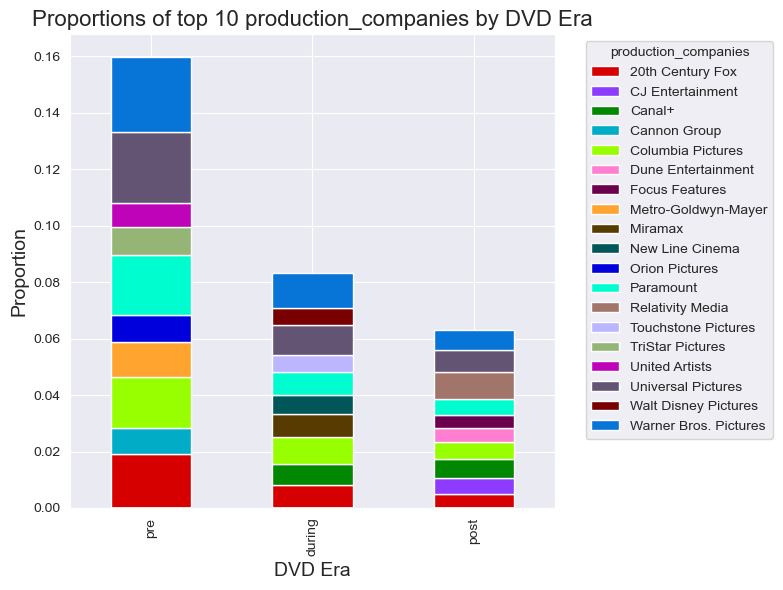

In [3]:
top_10_prod_companies = top_proportions_per_era(df_combined, 'production_companies', 10, islist=True)
plot_top_proportions_per_era(top_10_prod_companies, 'production_companies', 10)

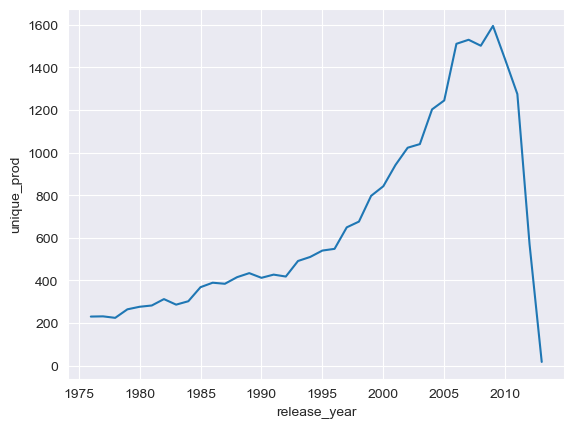

In [118]:
num_production_companies_per_year = df_combined.explode('production_companies').groupby('release_year')['production_companies'].nunique().reset_index(name='unique_prod')
sns.lineplot(data=num_production_companies_per_year, x='release_year', y='unique_prod')
plt.show()

## Countries

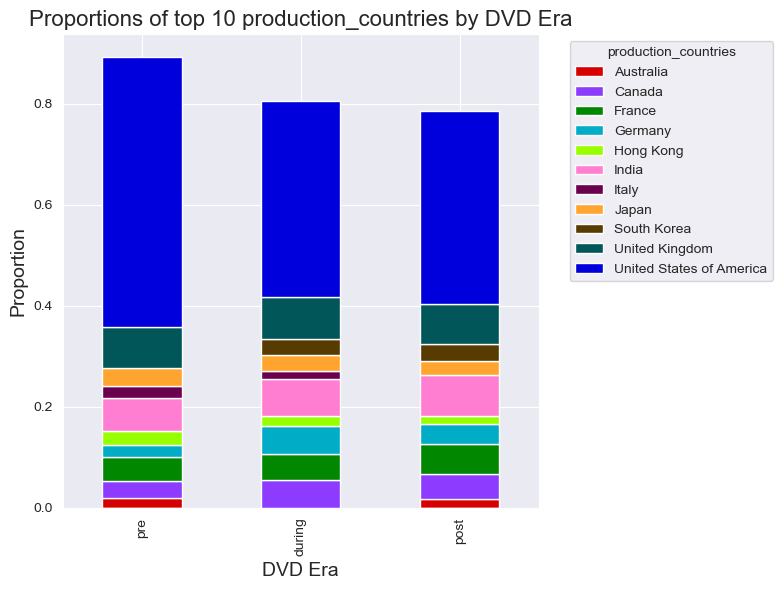

In [119]:
top_10_prod_countries = top_proportions_per_era(df_combined, 'production_countries', 10, True)
plot_top_proportions_per_era(top_10_prod_countries, 'production_countries', 10)

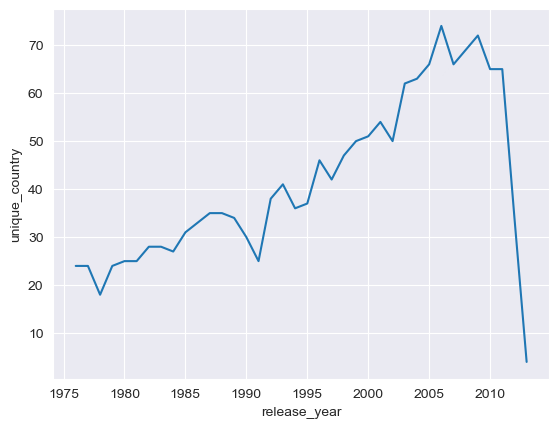

In [120]:
num_production_countries_per_year = df_combined.explode('production_countries').groupby('release_year')['production_countries'].nunique().reset_index(name='unique_country')
sns.lineplot(data=num_production_countries_per_year, x='release_year', y='unique_country')
plt.show()

## Original language

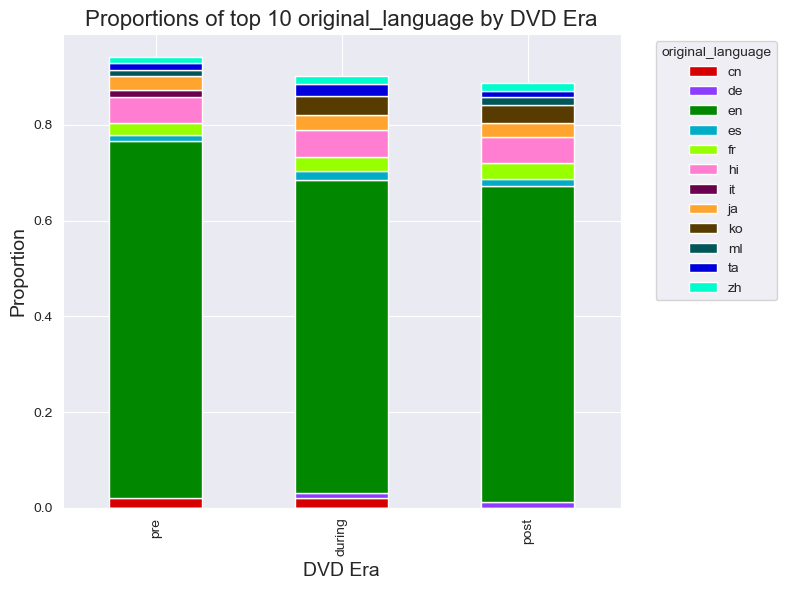

In [121]:
top_10_og_lang = top_proportions_per_era(df_combined, 'original_language', 10)
plot_top_proportions_per_era(top_10_og_lang, 'original_language', 10)

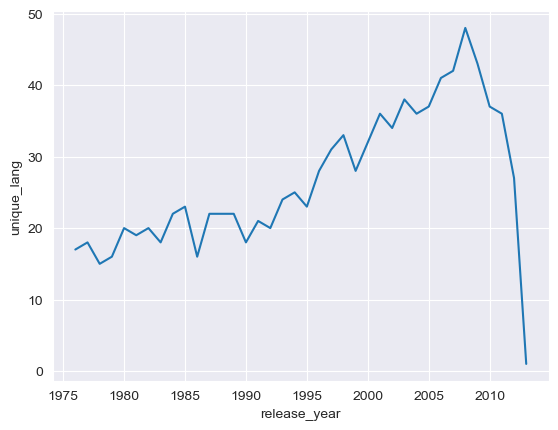

In [122]:
num_lang_per_year = df_combined.groupby('release_year')['original_language'].nunique().reset_index(name='unique_lang')
sns.lineplot(data=num_lang_per_year, x='release_year', y='unique_lang')
plt.show()

In [123]:
num_movies_per_year = df_combined.groupby('release_year').size().reset_index(name='num_movies')
num_movies_per_year.head()

,release_year,num_movies
0,1976,191
1,1977,207
2,1978,204
3,1979,221
4,1980,247


In [124]:
num_lang_per_year['ratio'] = num_lang_per_year['unique_lang'] / num_movies_per_year['num_movies']
num_lang_per_year.head()

,release_year,unique_lang,ratio
0,1976,17,0.089005
1,1977,18,0.086957
2,1978,15,0.073529
3,1979,16,0.072398
4,1980,20,0.080972


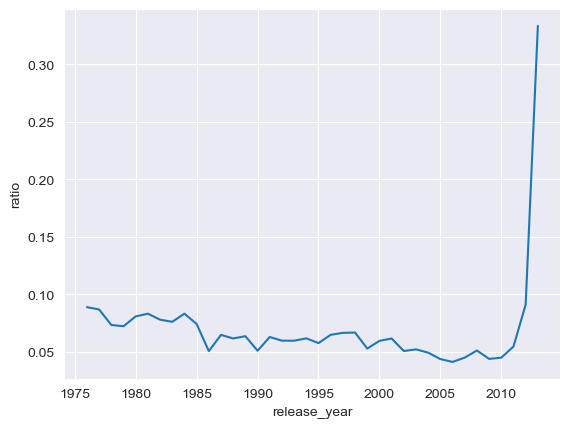

In [125]:
sns.lineplot(data=num_lang_per_year, x='release_year', y='ratio')
plt.show()

## genre


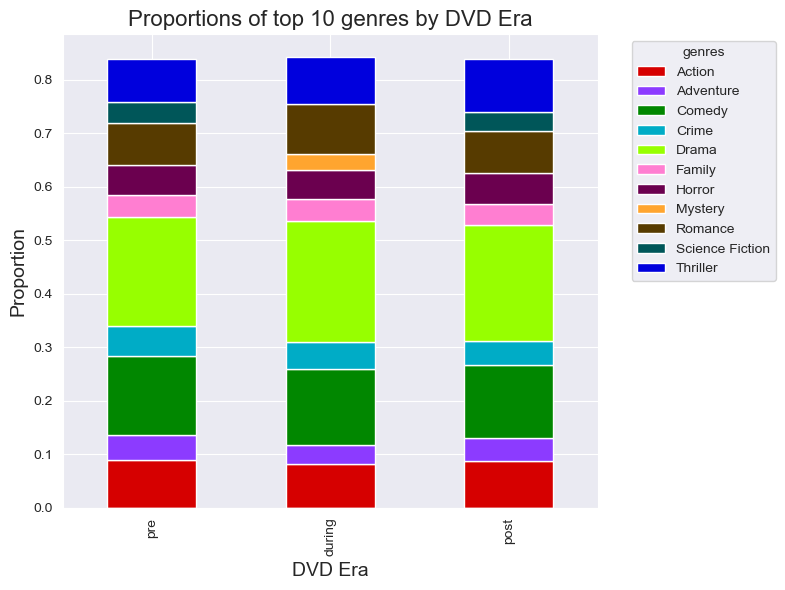

In [126]:
top_10_genre =top_proportions_per_era(df_combined, 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)

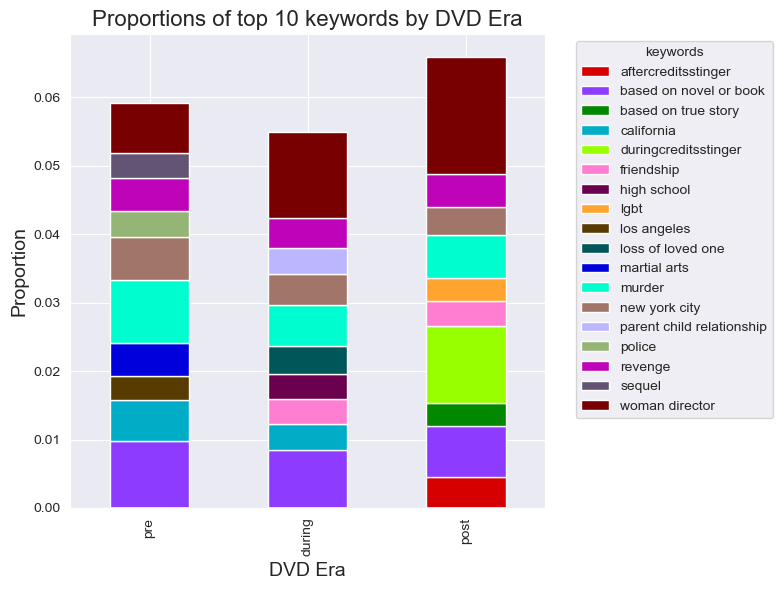

In [127]:
top_10_keyword =top_proportions_per_era(df_combined, 'keywords', 10, True)
plot_top_proportions_per_era(top_10_keyword, 'keywords', 10)

# TMDB dataset

In [4]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361971 entries, 0 to 453228
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   title                 361970 non-null  object
 1   release_date          361971 non-null  object
 2   revenue               361971 non-null  int64 
 3   runtime               361971 non-null  int64 
 4   budget                361971 non-null  int64 
 5   original_language     361971 non-null  object
 6   overview              283016 non-null  object
 7   genres                361971 non-null  object
 8   production_companies  361971 non-null  object
 9   production_countries  361971 non-null  object
 10  spoken_languages      361971 non-null  object
 11  keywords              361971 non-null  object
 12  release_year          361971 non-null  int64 
 13  dvd_era               361971 non-null  object
dtypes: int64(4), object(10)
memory usage: 41.4+ MB


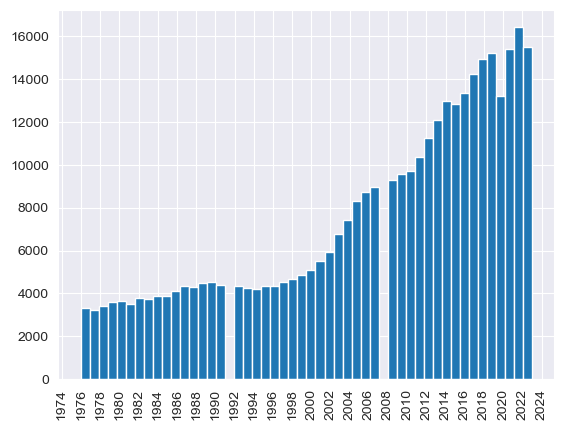

In [129]:
plt.hist(df_tmdb['release_year'], bins=50)
plt.locator_params(axis='x', nbins=50) 
plt.xticks(rotation=90)
plt.show()

In [130]:
df_tmdb['release_year'].describe()

count    360791.000000
mean       2006.722052
std          13.086210
min        1976.000000
25%        1998.000000
50%        2010.000000
75%        2018.000000
max        2023.000000
Name: release_year, dtype: float64

## Production countries

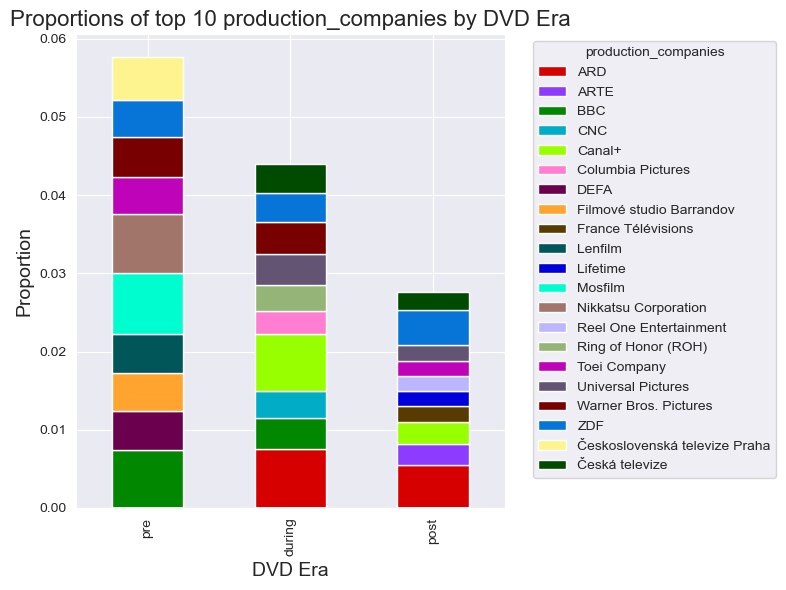

In [131]:
top_10_prod_companies = top_proportions_per_era(df_tmdb, 'production_companies', 10, islist=True)
plot_top_proportions_per_era(top_10_prod_companies, 'production_companies', 10)

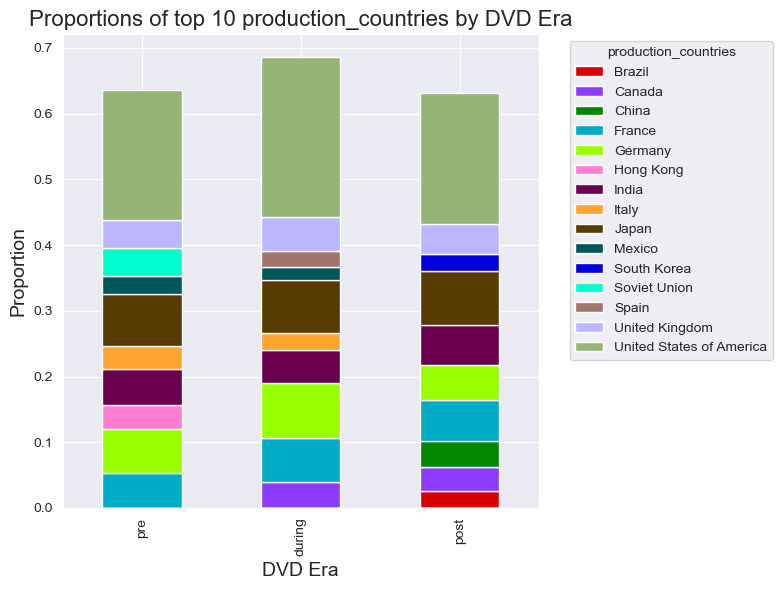

In [132]:
top_10_prod_countries = top_proportions_per_era(df_tmdb, 'production_countries', 10, islist=True)
plot_top_proportions_per_era(top_10_prod_countries, 'production_countries', 10)

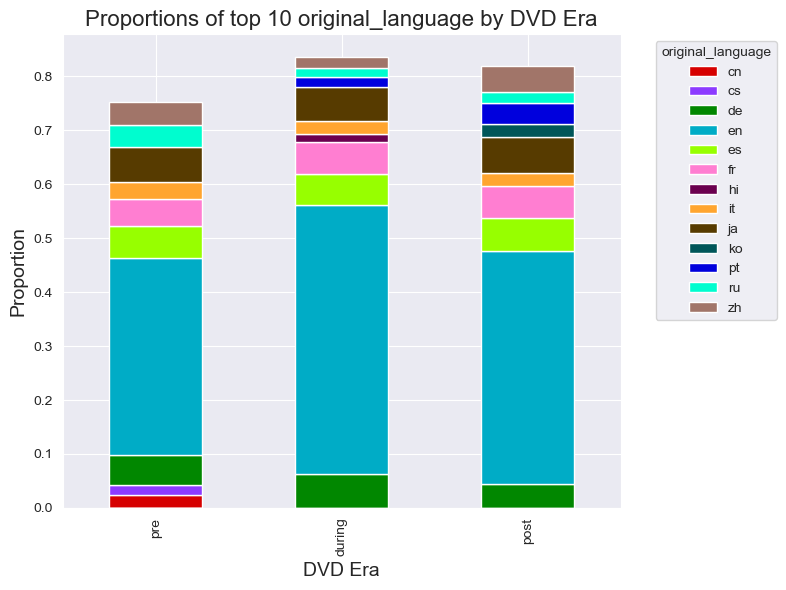

In [133]:
top_10_og_lang = top_proportions_per_era(df_tmdb, 'original_language', 10)
plot_top_proportions_per_era(top_10_og_lang, 'original_language', 10)

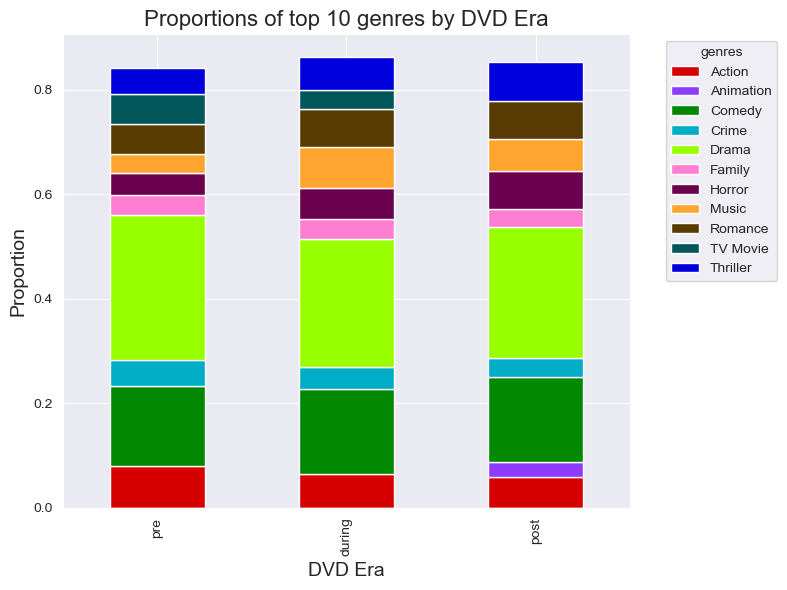

In [134]:
top_10_genre =top_proportions_per_era(df_tmdb, 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)

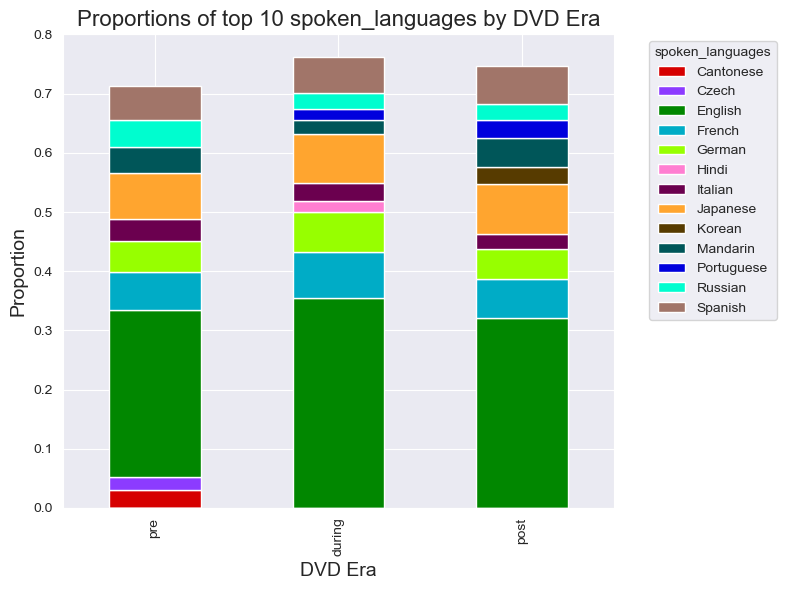

In [135]:
top_10_spoken_languages = top_proportions_per_era(df_tmdb, 'spoken_languages', 10, True)
plot_top_proportions_per_era(top_10_spoken_languages, 'spoken_languages', 10)

# Runtime


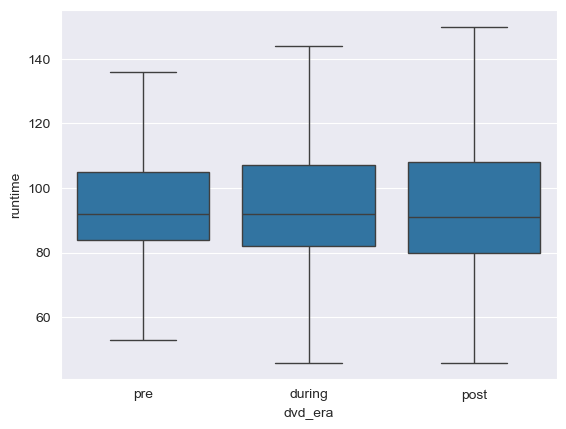

In [5]:
sns.boxplot(x='dvd_era', y='runtime', data=df_tmdb[df_tmdb['runtime'] > 0], showfliers=False, order=['pre', 'during', 'post'])
plt.show()

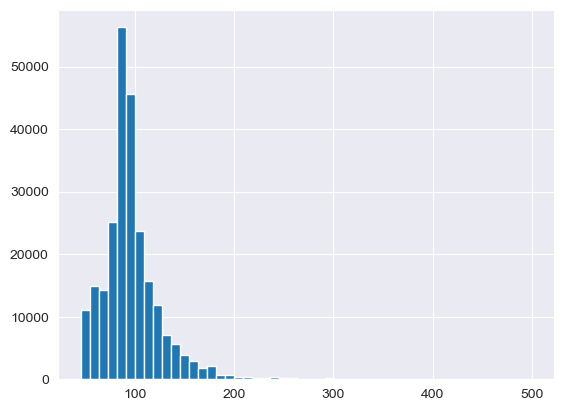

In [6]:
plt.hist(df_tmdb[(df_tmdb['runtime'] > 0)]['runtime'], bins=50)
plt.show()

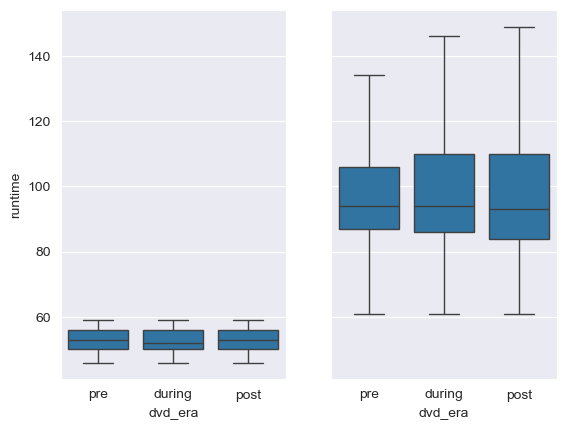

In [138]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax=ax1, x='dvd_era', y='runtime', data=df_tmdb[(df_tmdb['runtime'] > 0) & (df_tmdb['runtime'] < 60)], showfliers=False, order=['pre', 'during', 'post'])
sns.boxplot(ax=ax2, x='dvd_era', y='runtime', data=df_tmdb[df_tmdb['runtime'] > 60], showfliers=False, order=['pre', 'during', 'post'])
plt.show()

In [7]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA test
anova_result = stats.f_oneway(
    df_tmdb[(df_tmdb['dvd_era'] == 'pre') & (df_tmdb.runtime > 0)]['runtime'],
    df_tmdb[(df_tmdb['dvd_era'] == 'during') & (df_tmdb.runtime > 0)]['runtime'],
    df_tmdb[(df_tmdb['dvd_era'] == 'post') & (df_tmdb.runtime > 0)]['runtime']
)

print("ANOVA result:", anova_result)

# Post hoc test if ANOVA is significant
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(df_tmdb['runtime'], df_tmdb['dvd_era'])
    print(tukey_result)

ANOVA result: F_onewayResult(statistic=36.85707331743339, pvalue=9.89850483736645e-17)
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
during   post  -3.0703   0.0 -3.6366 -2.504   True
during    pre   1.6492   0.0  1.0081 2.2904   True
  post    pre   4.7195   0.0  4.2323 5.2068   True
--------------------------------------------------


In [140]:
df_tmdb[df_tmdb['runtime'] < 45].describe()

,revenue,runtime,budget,release_year
count,1.149730e+05,114973.0,1.149730e+05,114973.000000
mean,3.878086e+04,0.0,1.527981e+04,2007.794256
std,4.805076e+06,0.0,1.055179e+06,12.999357
min,0.000000e+00,0.0,0.000000e+00,1976.000000
25%,0.000000e+00,0.0,0.000000e+00,2000.000000
50%,0.000000e+00,0.0,0.000000e+00,2011.000000
75%,0.000000e+00,0.0,0.000000e+00,2018.000000
max,1.001978e+09,0.0,1.800000e+08,2023.000000


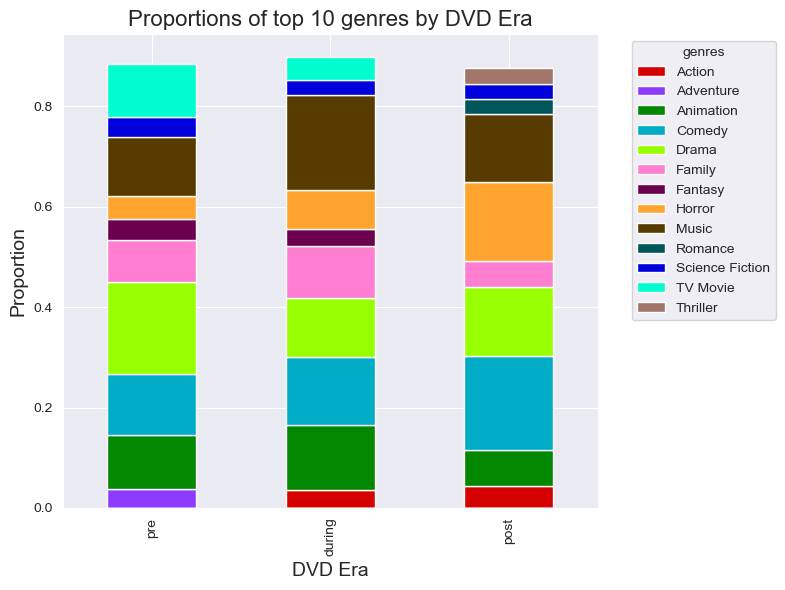

In [141]:
top_10_genre =top_proportions_per_era(df_tmdb[(df_tmdb['runtime'] < 60) & (df_tmdb['runtime'] > 0)], 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)

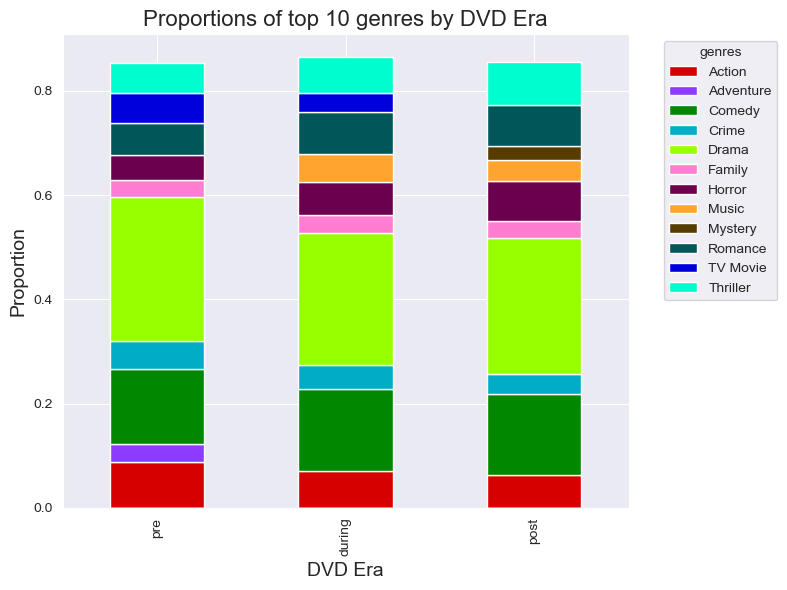

In [142]:
top_10_genre =top_proportions_per_era(df_tmdb[df_tmdb['runtime'] >= 60], 'genres', 10, True)
plot_top_proportions_per_era(top_10_genre, 'genres', 10)

# Continuous values

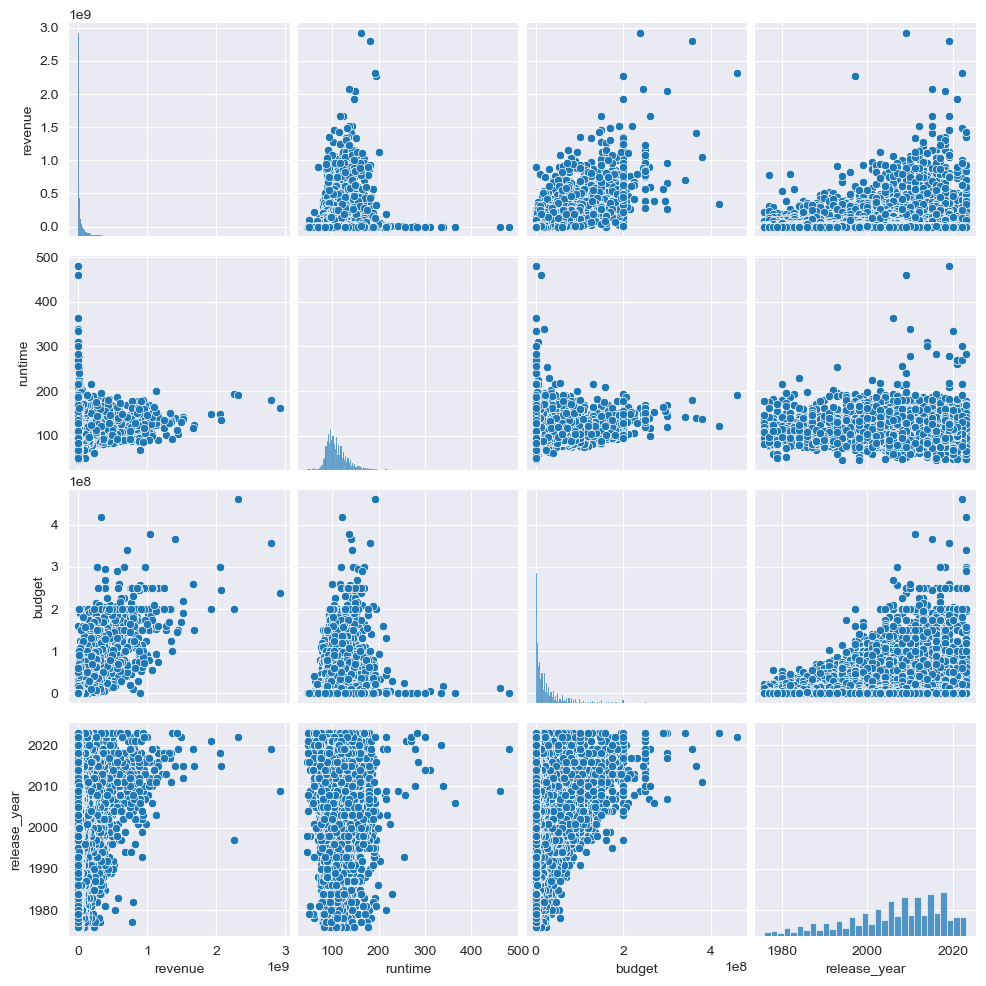

In [143]:
sns.pairplot(data=df_tmdb[(df_tmdb['runtime'] > 0) & (df_tmdb['revenue'] > 0) & (df_tmdb['budget'] > 0)])
plt.show()

# Revenue

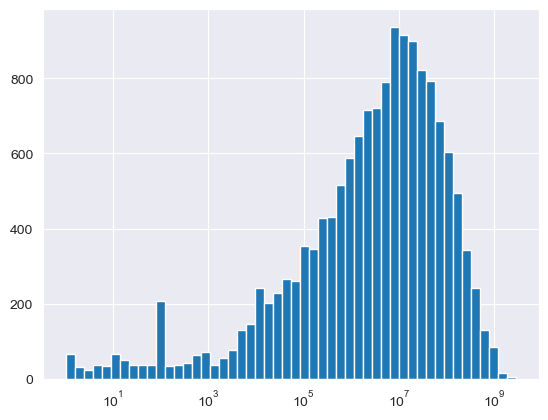

In [8]:
def plot_loghist(x, bins):
    """
    Code adapted from: https://stackoverflow.com/questions/7694298/how-to-make-a-log-log-histogram-in-python
    """
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

plot_loghist(df_tmdb[df_tmdb['revenue'] > 0]['revenue'], 50)

# Budget

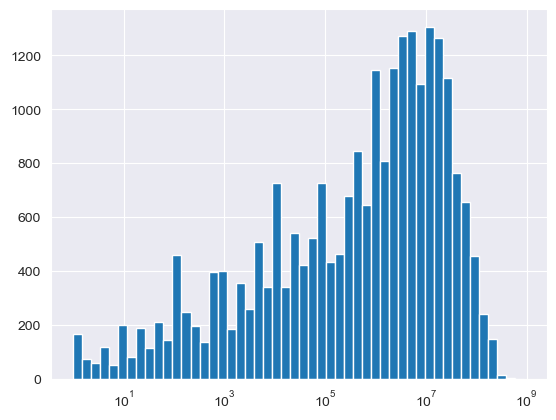

In [145]:
plot_loghist(df_tmdb[df_tmdb['budget'] > 0]['budget'], bins=50)

# Themes

In [26]:
%run src/utils/data_utils.py
%run src/utils/plot_utils.py

[nltk_data] Downloading package stopwords to /Users/chsce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


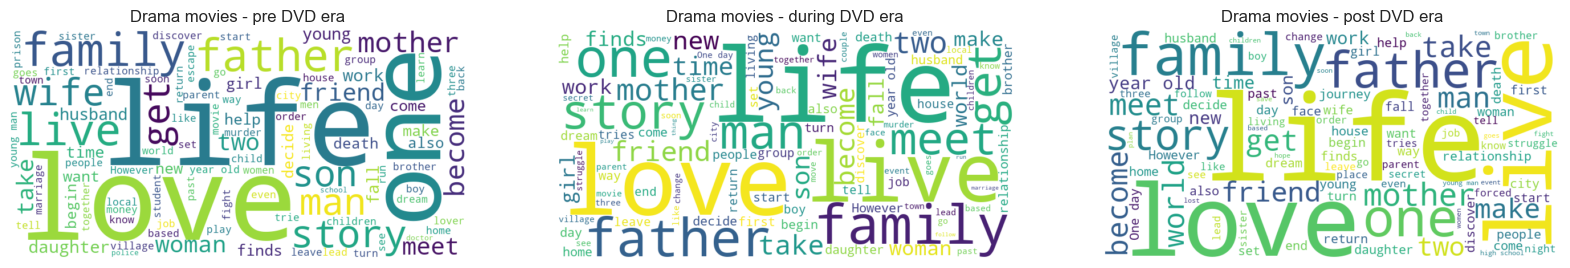

In [27]:
wcs = wordcloud_per_genre(df_tmdb, 'Drama', [])
plot_wordclouds_per_genre(wcs, 'Drama')

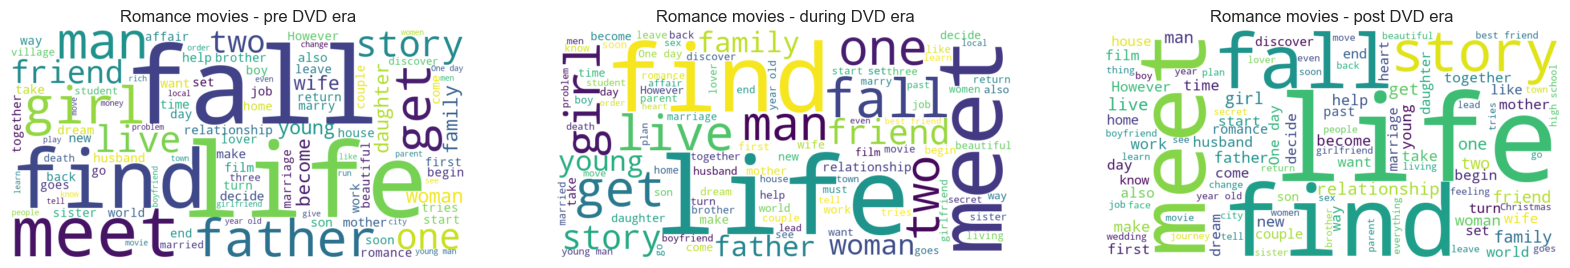

In [28]:
wcs = wordcloud_per_genre(df_tmdb, 'Romance', ["love"])
plot_wordclouds_per_genre(wcs, 'Romance')

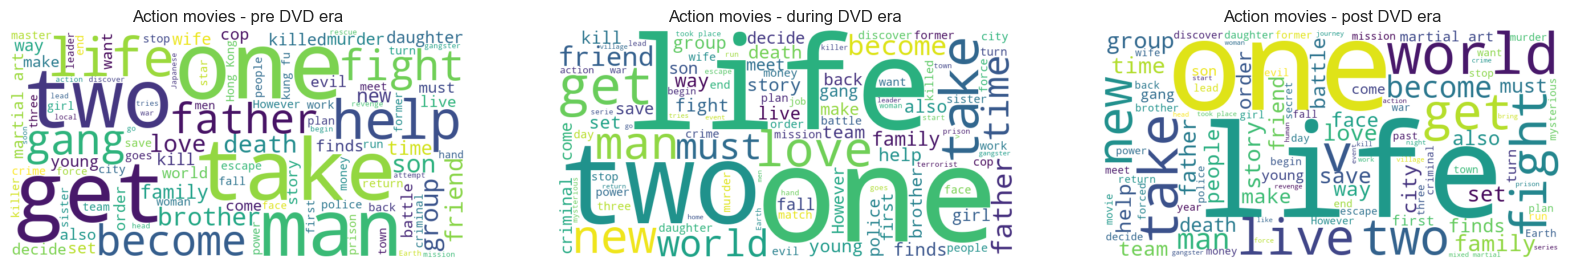

In [29]:
wcs = wordcloud_per_genre(df_tmdb, 'Action', [])
plot_wordclouds_per_genre(wcs, 'Action')

# Blockbusters


In [208]:
blockbusters = df_tmdb[df_tmdb['budget'] >= 1e8]

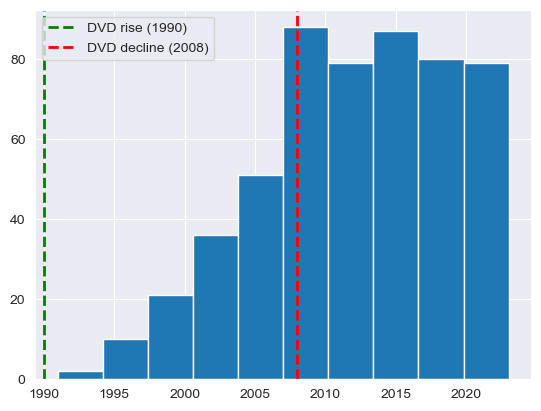

In [210]:
blockbusters.release_year.hist()
plt.axvline(x=1990, color='green', linestyle='--', linewidth=2, label=f'DVD rise ({1990})')
plt.axvline(x=2008, color='red', linestyle='--', linewidth=2, label=f'DVD decline ({2008})')
plt.legend()
plt.show()

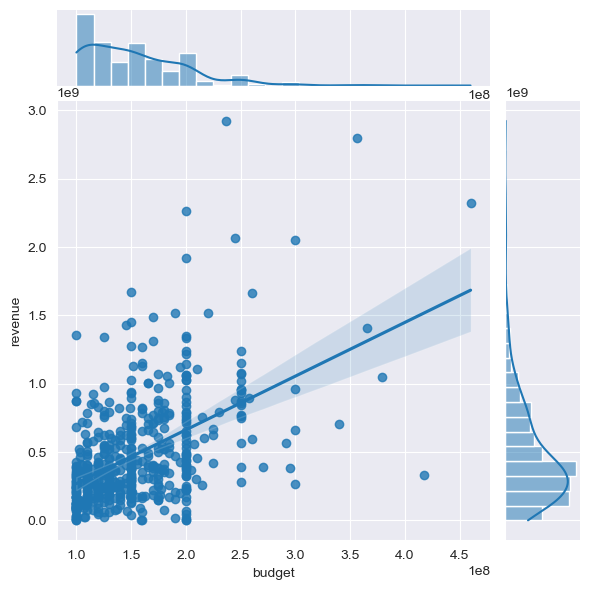

In [212]:
g = sns.jointplot(data=blockbusters[blockbusters['revenue'] > 0], x='budget', y='revenue', kind='reg')


<Axes: xlabel='release_year', ylabel='prop'>

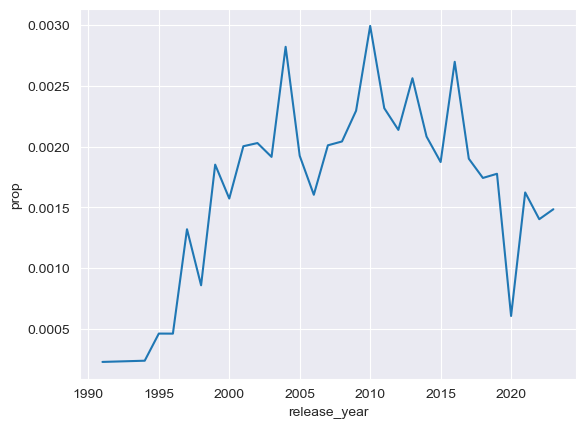

In [213]:
movies_per_year = df_tmdb.groupby('release_year').size()
prop =blockbusters.groupby('release_year').size() / movies_per_year
prop = prop.reset_index(name='prop')
sns.lineplot(prop, x='release_year', y='prop')

# Niche films


In [179]:
df_tmdb[df_tmdb.budget > 0].budget.describe()

count    2.397400e+04
mean     1.133224e+07
std      2.810748e+07
min      1.000000e+00
25%      2.000000e+04
50%      1.000000e+06
75%      9.313189e+06
max      8.880000e+08
Name: budget, dtype: float64

In [180]:
niche = df_tmdb[df_tmdb['budget'] <= 1e6]


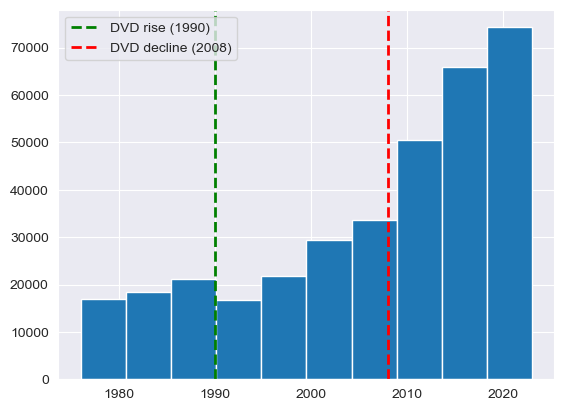

In [181]:
niche.release_year.hist()
plt.axvline(x=1990, color='green', linestyle='--', linewidth=2, label=f'DVD rise ({1990})')
plt.axvline(x=2008, color='red', linestyle='--', linewidth=2, label=f'DVD decline ({2008})')
plt.legend()
plt.show()

<Axes: xlabel='release_year', ylabel='prop'>

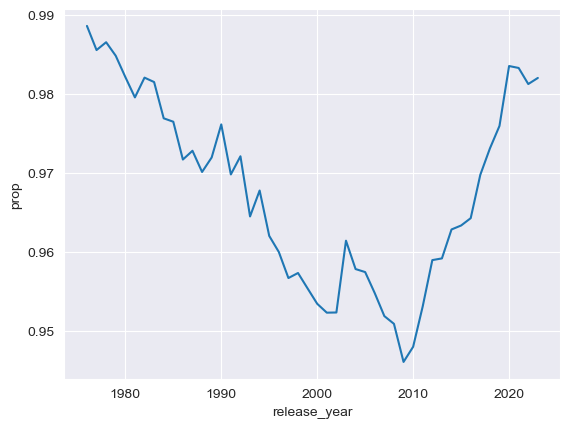

In [200]:
movies_per_year = df_tmdb.groupby('release_year').size()
prop =niche.groupby('release_year').size() / movies_per_year
prop = prop.reset_index(name='prop')
sns.lineplot(prop, x='release_year', y='prop')

# Topics 

In [100]:
from src.models.lda_model import *

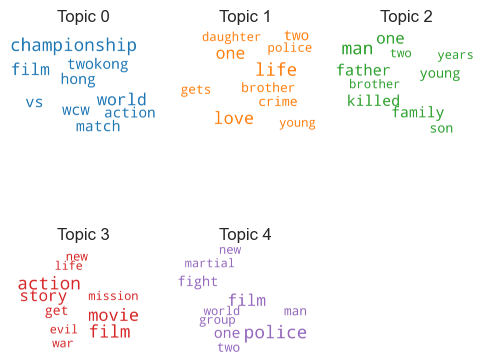

In [136]:
%run src/models/lda_model.py
text_data = get_movie_plots(df_tmdb, 'Action', 'pre')
model = LDAModel(text_data, 5)
model.train()
model.plot_topics()

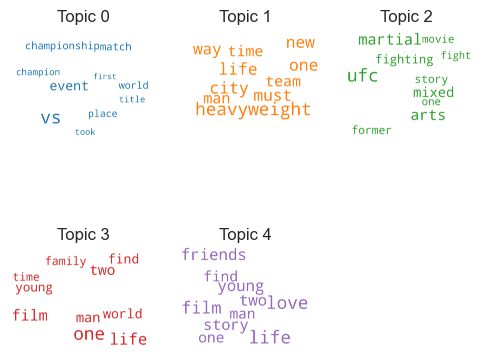

In [137]:
model = LDAModel(get_movie_plots(df_tmdb, 'Action', 'post'), 5)
model.train()
model.plot_topics()